# 🧾 Option Pricing — Black-Scholes Model

The **Black-Scholes Model** provides a closed-form solution for pricing European call and put options.

---

## 🧮 Black-Scholes Formula for a Call Option:

\[
C = S_0 \cdot N(d_1) - K e^{-rT} \cdot N(d_2)
\]

\[
d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma \sqrt{T}}, \quad
d_2 = d_1 - \sigma \sqrt{T}
\]

Where:
- \( S_0 \): Current stock price
- \( K \): Strike price
- \( T \): Time to maturity (in years)
- \( r \): Risk-free interest rate
- \( \sigma \): Volatility of the underlying asset
- \( N(\cdot) \): Cumulative distribution function of standard normal

---

## 📉 Put Option Formula:

\[
P = K e^{-rT} \cdot N(-d_2) - S_0 \cdot N(-d_1)
\]

---

## 🧾 Assumptions:
- No dividends
- European-style option (only exercisable at maturity)
- Log-normal price distribution
- Constant volatility and interest rate

We'll implement this in Python and visualize how option prices vary with different inputs.


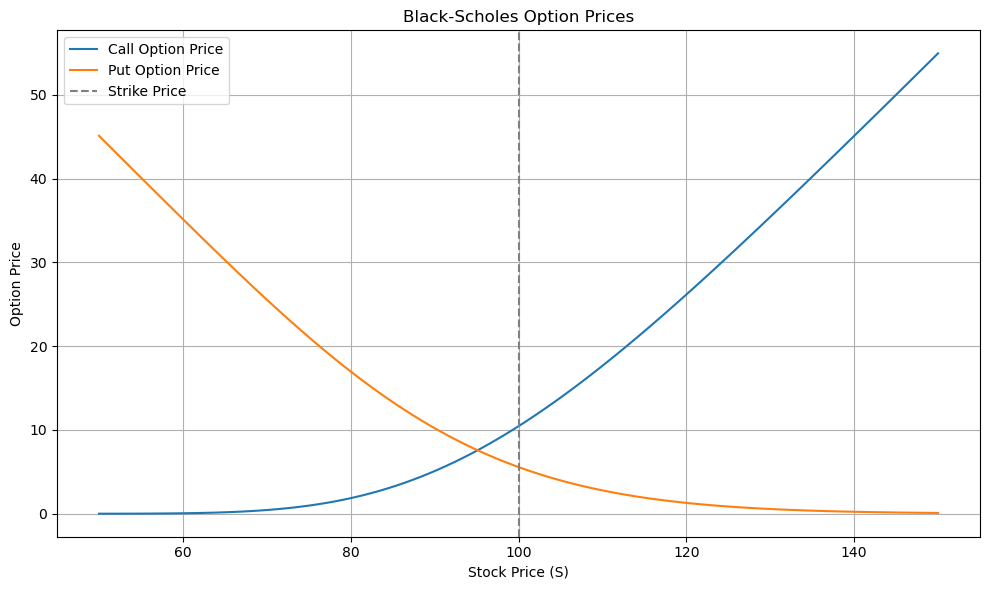

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Black-Scholes function
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("option_type must be 'call' or 'put'")
    
    return price

# Parameters
S = np.linspace(50, 150, 100)  # Stock prices
K = 100  # Strike price
T = 1    # 1 year
r = 0.05  # 5% risk-free rate
sigma = 0.2  # 20% volatility

# Compute prices
call_prices = [black_scholes(s, K, T, r, sigma, 'call') for s in S]
put_prices  = [black_scholes(s, K, T, r, sigma, 'put')  for s in S]

# Plot
plt.figure(figsize=(10,6))
plt.plot(S, call_prices, label='Call Option Price')
plt.plot(S, put_prices, label='Put Option Price')
plt.axvline(K, color='gray', linestyle='--', label='Strike Price')
plt.title('Black-Scholes Option Prices')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
